In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
train = torchvision.datasets.FashionMNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = torchvision.datasets.FashionMNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True, num_workers=2)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False, num_workers=2)

In [3]:
trainset_shape = trainset.dataset.train_data.shape
testset_shape = testset.dataset.test_data.shape

print(trainset_shape, testset_shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


/home/scarlet/Projects/PyEnvs/DSPyTorchEnv/DSPyTEnv/lib/python3.7/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/scarlet/Projects/PyEnvs/DSPyTorchEnv/DSPyTEnv/lib/python3.7/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1) 

In [5]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [6]:
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)

In [7]:
for epoch in range(5): 
    for data in trainset:  
        X, y = data  
        net.zero_grad()  
        output = net(X.view(-1,784))  
        loss = loss_criterion(output, y)  
        loss.backward()  
        optimizer.step()  
    print(loss)  

tensor(0.6031, grad_fn=<NllLossBackward>)
tensor(0.3824, grad_fn=<NllLossBackward>)
tensor(0.0234, grad_fn=<NllLossBackward>)
tensor(0.2419, grad_fn=<NllLossBackward>)
tensor(0.2769, grad_fn=<NllLossBackward>)


In [8]:
correct = 0
total = 0

# incorr = []
incorr_X = []
incorr_y = []
otpt = []
torch_argmax_i = []
y_indx = []
i_trch_argmx = []
idx_y = []

# y_indx[4] torch_argmax_i[4] 

corr_y_indx = []
corr_torch_argmax_i = []

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        
        for idx, i in enumerate(output):
               if torch.argmax(i) == y[idx]:
                correct += 1
                corr_y_indx.append(y[idx])
                corr_torch_argmax_i.append(torch.argmax(i))

               else:
#                 incorr.append([X, y, output, torch.argmax(i), y[idx]])
                     incorr_X.append(X) 
                     incorr_y.append(y)
                     otpt.append(output)
                     torch_argmax_i.append(torch.argmax(i))
                     y_indx.append(y[idx])
                     i_trch_argmx.append(i)
                     idx_y.append(idx)
               total += 1

print("Accuracy: ", round(correct/total, 2))

Accuracy:  0.84


In [9]:
# Predicted Label vs Ground Truth

In [10]:
for i in range(10):
    print(corr_torch_argmax_i[i])
    print(corr_y_indx[i])
    print()

tensor(9)
tensor(9)

tensor(2)
tensor(2)

tensor(1)
tensor(1)

tensor(1)
tensor(1)

tensor(6)
tensor(6)

tensor(1)
tensor(1)

tensor(4)
tensor(4)

tensor(6)
tensor(6)

tensor(5)
tensor(5)

tensor(7)
tensor(7)



In [11]:
# Predicted Label vs Ground Truth

In [12]:
for i in range(10):
    print(torch_argmax_i[i])
    print(y_indx[i])
    print()

tensor(2)
tensor(4)

tensor(2)
tensor(4)

tensor(5)
tensor(9)

tensor(2)
tensor(4)

tensor(0)
tensor(3)

tensor(6)
tensor(2)

tensor(2)
tensor(4)

tensor(0)
tensor(2)

tensor(4)
tensor(3)

tensor(7)
tensor(9)



In [17]:
print("The state dict keys: \n\n", net.state_dict().keys())

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [18]:
checkpoint = {'model':  Net(),
              'state_dict': net.state_dict(),
              'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, 'fcheckpoint.pth')

/home/scarlet/Projects/PyEnvs/DSPyTorchEnv/DSPyTEnv/lib/python3.7/site-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [19]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False
    
    model.eval()
    
    return model

In [21]:
model = load_checkpoint('fcheckpoint.pth')
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [22]:
model = None

In [37]:
set(train.targets)

{tensor(5),
 tensor(7),
 tensor(9),
 tensor(9),
 tensor(7),
 tensor(1),
 tensor(0),
 tensor(7),
 tensor(0),
 tensor(6),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(9),
 tensor(2),
 tensor(1),
 tensor(4),
 tensor(2),
 tensor(0),
 tensor(7),
 tensor(6),
 tensor(4),
 tensor(5),
 tensor(7),
 tensor(7),
 tensor(2),
 tensor(0),
 tensor(7),
 tensor(7),
 tensor(1),
 tensor(0),
 tensor(9),
 tensor(8),
 tensor(2),
 tensor(9),
 tensor(8),
 tensor(4),
 tensor(2),
 tensor(8),
 tensor(5),
 tensor(6),
 tensor(6),
 tensor(3),
 tensor(2),
 tensor(7),
 tensor(5),
 tensor(3),
 tensor(2),
 tensor(2),
 tensor(9),
 tensor(1),
 tensor(7),
 tensor(9),
 tensor(1),
 tensor(0),
 tensor(0),
 tensor(5),
 tensor(0),
 tensor(5),
 tensor(1),
 tensor(0),
 tensor(9),
 tensor(9),
 tensor(9),
 tensor(4),
 tensor(8),
 tensor(3),
 tensor(4),
 tensor(8),
 tensor(6),
 tensor(8),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(2),
 tensor(3),
 tensor(7),
 tensor(8),
 tensor(4),
 tensor(3),
 tensor(2),
 ten

In [28]:
len(y_indx_set)

1589

In [39]:
dataiter = iter(trainset)

tr_img, tr_lbl = dataiter.next()

print(tr_img.shape)
print(tr_lbl.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


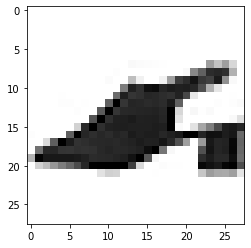

In [41]:
import matplotlib.pyplot as plt

plt.imshow(tr_img[0].numpy().squeeze(), cmap='gray_r');

IndexError: index 10 is out of bounds for dimension 0 with size 10

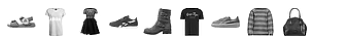

In [48]:
figure = plt.figure()

num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(tr_img[index].numpy().squeeze(), cmap='gray_r')

In [49]:
def classify(img, ps):
    ''' 
    Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [51]:
import numpy as np

Predicted Class = 7


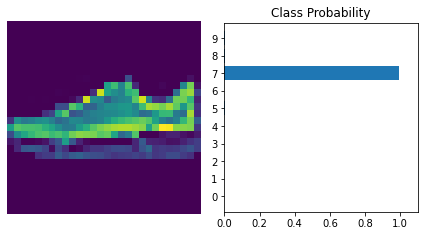

In [67]:
images, labels = next(iter(testset))
# replace trainloader to check training accuracy.

img = images[9].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logpb = net(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
pb = torch.exp(logpb)
probab = list(pb.numpy()[0])
print("Predicted Class =", probab.index(max(probab)))
classify(img.view(1, 28, 28), pb)

In [59]:
len(images)

10

Predicted Class = 9
Predicted Class = 2
Predicted Class = 1
Predicted Class = 1
Predicted Class = 6
Predicted Class = 1
Predicted Class = 4
Predicted Class = 6
Predicted Class = 5
Predicted Class = 7


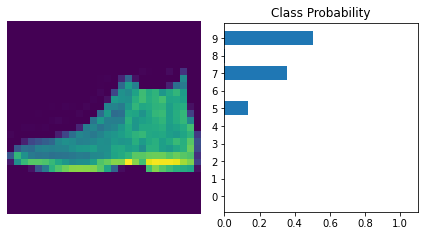

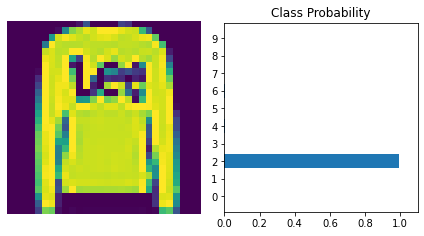

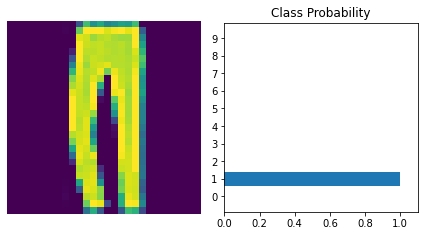

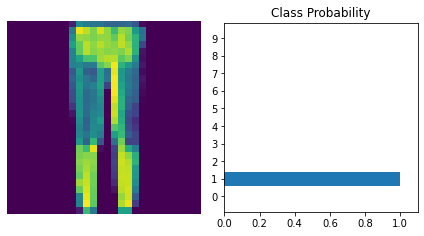

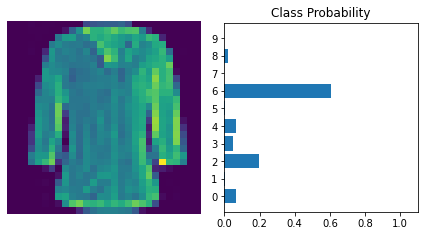

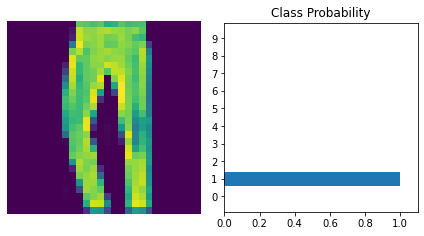

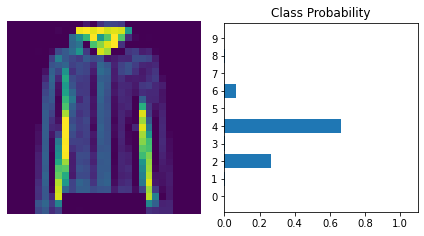

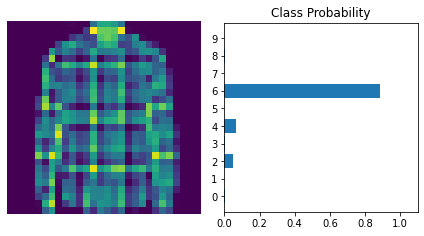

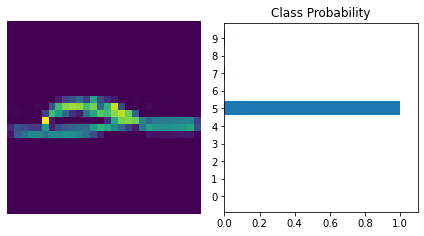

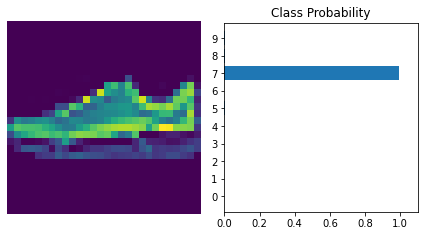

In [91]:
images, labels = next(iter(testset))
# replace trainloader to check training accuracy.

for i in images:
    img = i.view(1, 784)
# Turn off gradients to speed up this part
    with torch.no_grad():
        logpb = net(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    pb = torch.exp(logpb)
    probab = list(pb.numpy()[0])
    print("Predicted Class =", probab.index(max(probab)))
    classify(img.view(1, 28, 28), pb)

Predicted Class = 0
Predicted Class = 9
Predicted Class = 8
Predicted Class = 5
Predicted Class = 7
Predicted Class = 2
Predicted Class = 5
Predicted Class = 8
Predicted Class = 7
Predicted Class = 4


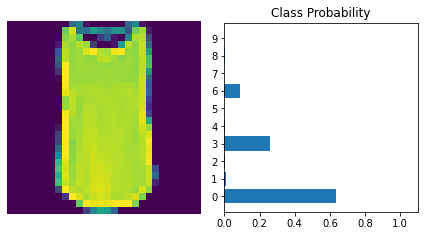

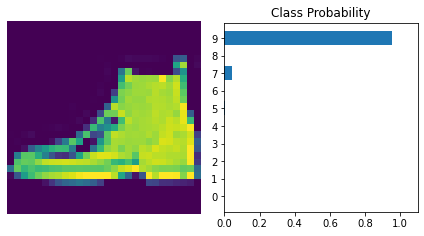

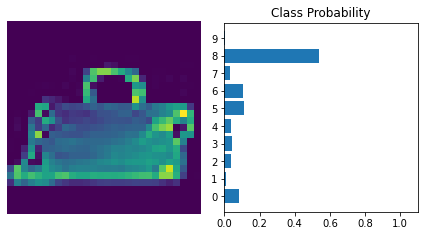

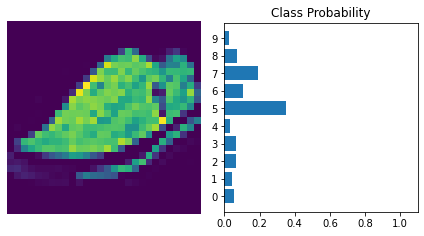

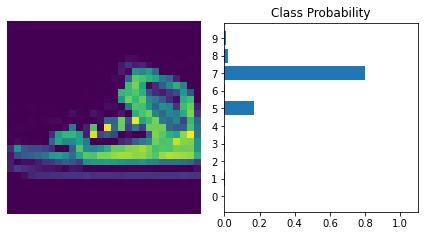

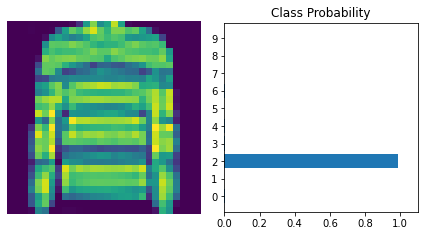

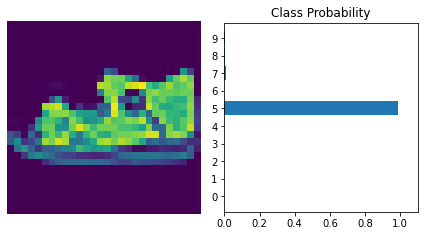

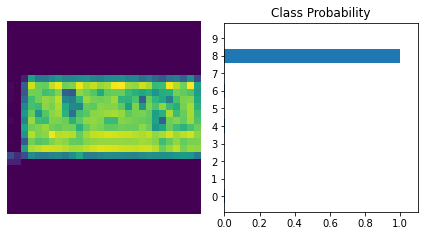

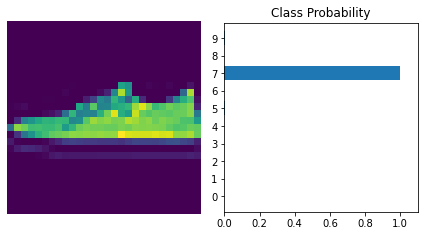

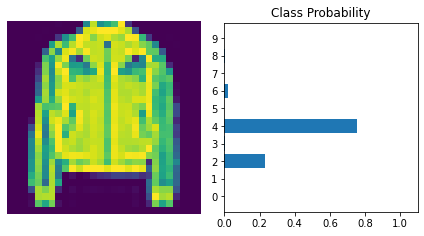

In [88]:
images, labels = next(iter(trainset))
# replace trainloader to check training accuracy.

for i in images:
    img = i.view(1, 784)
# Turn off gradients to speed up this part
    with torch.no_grad():
        logpb = net(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    pb = torch.exp(logpb)
    probab = list(pb.numpy()[0])
    print("Predicted Class =", probab.index(max(probab)))
    classify(img.view(1, 28, 28), pb)

In [75]:
len(trainset)

6000

In [80]:
len(testset)

1000

In [92]:
#                 corr_y_indx.append(y[idx])
#                 corr_torch_argmax_i.append(torch.argmax(i))

#                else:
# #                 incorr.append([X, y, output, torch.argmax(i), y[idx]])
#                      incorr_X.append(X) 
#                      incorr_y.append(y)
#                      otpt.append(output)
#                      torch_argmax_i.append(torch.argmax(i))
#                      y_indx.append(y[idx])
#                      i_trch_argmx.append(i)
#                      idx_y.append(idx)

In [95]:
plt.imshow(incorr_X[0].view(28, 28))

RuntimeError: shape '[28, 28]' is invalid for input of size 7840